# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [50]:
# Code Here
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from plotnine import *
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import warnings 
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

penguins = load_penguins()

penguins_practice = penguins.copy()
penguins_practice = penguins_practice.dropna()
penguins_practice.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [51]:
warnings.simplefilter('ignore', ConvergenceWarning)
# Elastic Net

X = penguins_practice.drop(columns=['bill_depth_mm'])
y = penguins_practice["bill_depth_mm"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_elastic_net = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
)

parameter_grid = {'elastic_net__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'elastic_net__l1_ratio':[0.2, 0.4, 0.6, 0.8, 1]}

gscv_elastic = GridSearchCV(lr_elastic_net, parameter_grid, cv = 5, scoring='neg_mean_squared_error')

gscv_fitted_elastic_net = gscv_elastic.fit(X, y)

# Find best estimator 
best_pipeline_elastic = gscv_fitted_elastic_net.best_estimator_
elastic_regression_model = best_pipeline_elastic.named_steps['elastic_net']

parameters = gscv_fitted_elastic_net.cv_results_['params']
scores = gscv_fitted_elastic_net.cv_results_['mean_test_score']
scores = -scores

data = {
    'Parameters': parameters,
    'MSE': scores
}

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(data)
df.sort_values(by = 'MSE', ascending = True)


,Parameters,MSE
9,"{'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 1}",0.865160
4,"{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 1}",0.870470
1,"{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 0.4}",0.870724
0,"{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 0.2}",0.870854
2,"{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 0.6}",0.870971
3,"{'elastic_net__alpha': 0.001, 'elastic_net__l1_ratio': 0.8}",0.871057
8,"{'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.8}",0.916765
14,"{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 1}",0.941111
7,"{'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.6}",0.976714
6,"{'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.4}",0.991890


In [52]:
warnings.simplefilter('ignore', ConvergenceWarning)
# KNN (tuning)
X = penguins_practice.drop(columns=['bill_depth_mm'])
y = penguins_practice["bill_depth_mm"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor())]
)

k_grid = {'knn__n_neighbors': [1,2,3,4,5,10,15,20,25]}

gscv_knn = GridSearchCV(knn_pipeline, k_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted_knn = gscv_knn.fit(X, y)

# Find best estimator 
best_pipeline_knn = gscv_fitted_knn.best_estimator_
knn_model = best_pipeline_knn.named_steps['knn']

parameters = gscv_fitted_knn.cv_results_['params']
k_scores = gscv_fitted_knn.cv_results_['mean_test_score']
k_scores = -k_scores

data = {
    'Parameters': parameters,
    'MSE': k_scores
}

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(data)
df.sort_values(by = 'MSE', ascending = True)

,Parameters,MSE
3,{'knn__n_neighbors': 4},1.131143
2,{'knn__n_neighbors': 3},1.150567
5,{'knn__n_neighbors': 10},1.182909
4,{'knn__n_neighbors': 5},1.191880
1,{'knn__n_neighbors': 2},1.225094
6,{'knn__n_neighbors': 15},1.231396
7,{'knn__n_neighbors': 20},1.335965
8,{'knn__n_neighbors': 25},1.380405
0,{'knn__n_neighbors': 1},1.421694


In [80]:
warnings.simplefilter('ignore', ConvergenceWarning)
# KNN Model 2(tuning)
X = penguins_practice.drop(columns=['bill_depth_mm'])
y = penguins_practice["bill_depth_mm"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsRegressor())]
)

k_grid = {'knn__n_neighbors':[30,35,40,45,50,55,60,70,100]}

gscv_knn = GridSearchCV(knn_pipeline, k_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted_knn = gscv_knn.fit(X, y)

# Find best estimator 
best_pipeline_knn = gscv_fitted_knn.best_estimator_
knn_model = best_pipeline_knn.named_steps['knn']

parameters = gscv_fitted_knn.cv_results_['params']
k_scores_2 = gscv_fitted_knn.cv_results_['mean_test_score']
k_scores_2 = -k_scores_2

data = {
    'Parameters': parameters,
    'MSE': k_scores_2
}

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(data)
df.sort_values(by = 'MSE', ascending = True)

,Parameters,MSE
0,{'knn__n_neighbors': 30},1.449305
1,{'knn__n_neighbors': 35},1.523502
2,{'knn__n_neighbors': 40},1.607296
3,{'knn__n_neighbors': 45},1.731006
4,{'knn__n_neighbors': 50},1.911282
5,{'knn__n_neighbors': 55},2.055810
6,{'knn__n_neighbors': 60},2.193382
7,{'knn__n_neighbors': 70},2.475351
8,{'knn__n_neighbors': 100},3.346643


In [53]:
warnings.simplefilter('ignore', ConvergenceWarning)
# Decision Tree (tuning)

X = penguins_practice.drop(columns=['bill_depth_mm'])
y = penguins_practice["bill_depth_mm"]

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decisiontree", DecisionTreeRegressor())]
)

leafs_grid = {'decisiontree__min_samples_leaf': [1,2,3,4,5,10,15,20,25,50]}

gscv_dt = GridSearchCV(dt_pipeline, leafs_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted_dt = gscv_dt.fit(X, y)

# Find best estimator 
best_pipeline_dt = gscv_fitted_dt.best_estimator_
dt_model = best_pipeline_dt.named_steps['decisiontree']

parameters = gscv_fitted_dt.cv_results_['params']
dt_scores = gscv_fitted_dt.cv_results_['mean_test_score']
dt_scores = -dt_scores

data = {
    'Parameters': parameters,
    'MSE': dt_scores
}

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(data)
df.sort_values(by = 'MSE', ascending = True)


,Parameters,MSE
8,{'decisiontree__min_samples_leaf': 25},0.771149
7,{'decisiontree__min_samples_leaf': 20},0.819950
6,{'decisiontree__min_samples_leaf': 15},0.823462
5,{'decisiontree__min_samples_leaf': 10},0.868742
9,{'decisiontree__min_samples_leaf': 50},0.950212
4,{'decisiontree__min_samples_leaf': 5},0.961763
3,{'decisiontree__min_samples_leaf': 4},1.082563
2,{'decisiontree__min_samples_leaf': 3},1.180101
1,{'decisiontree__min_samples_leaf': 2},1.333049
0,{'decisiontree__min_samples_leaf': 1},1.529844


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [57]:
# Graph for Elastic Net MSE's vs Complexity 
df_elastic = pd.DataFrame({
    'Alpha/L1_Combinations': range(0,30),
    'MSE': scores
})

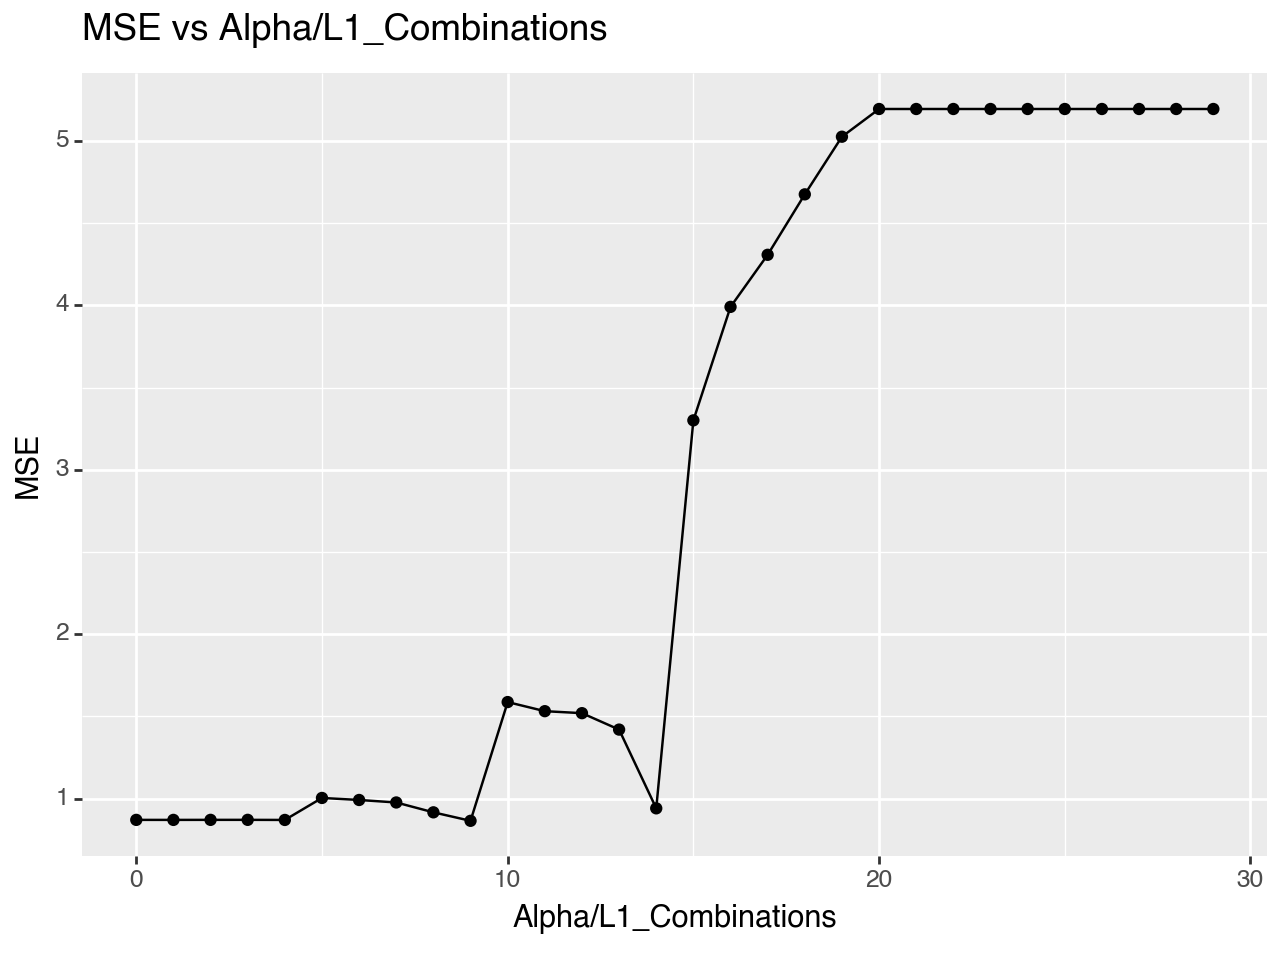

<Figure Size: (640 x 480)>

In [68]:
plot = (ggplot(df_elastic, aes(x='Alpha/L1_Combinations', y='MSE'))
    + geom_point()
    + geom_line()
    + labs(title='MSE vs Alpha/L1_Combinations', x='Alpha/L1_Combinations', y='MSE'))
plot     

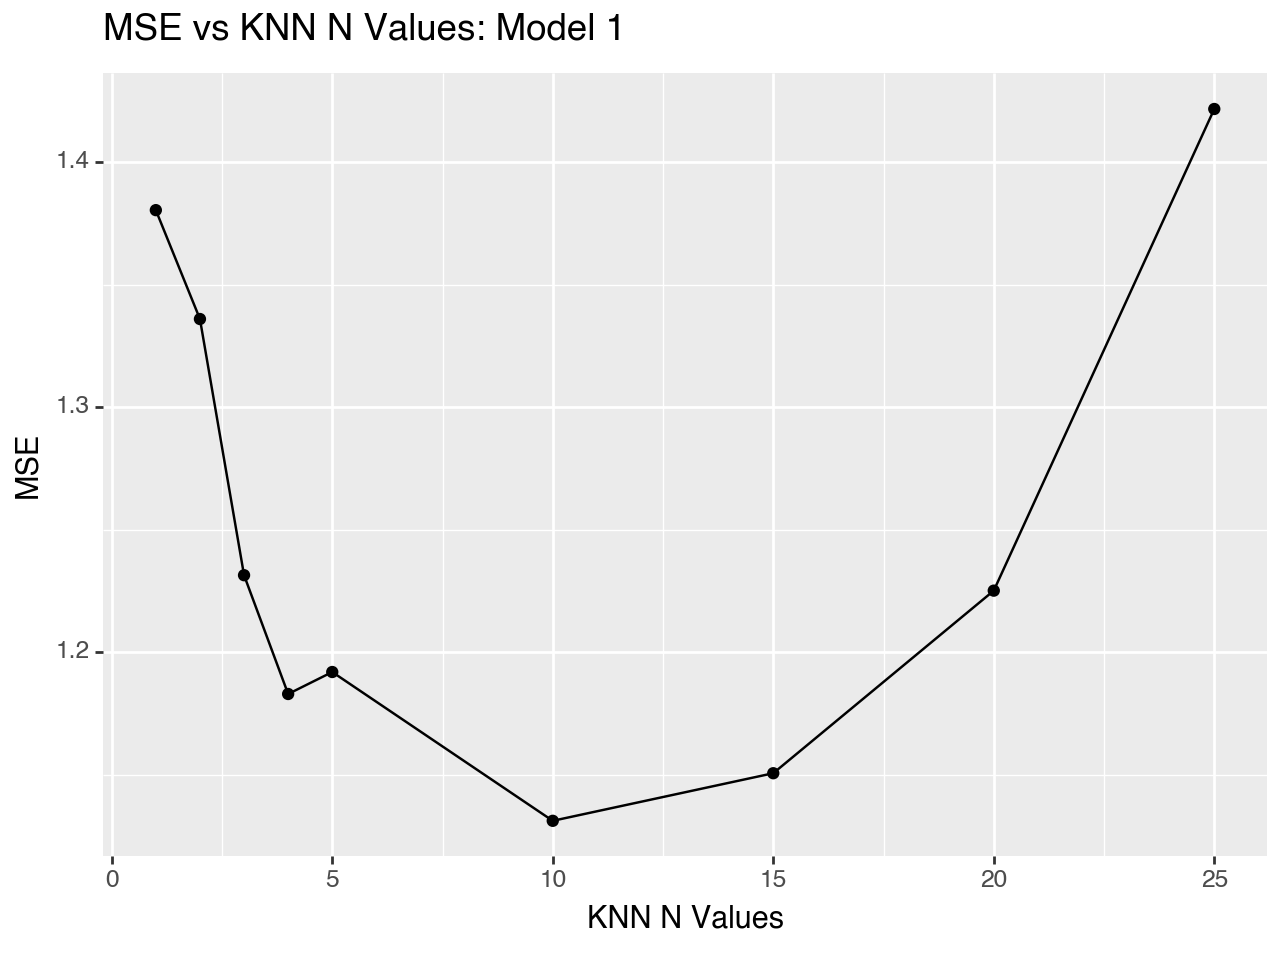

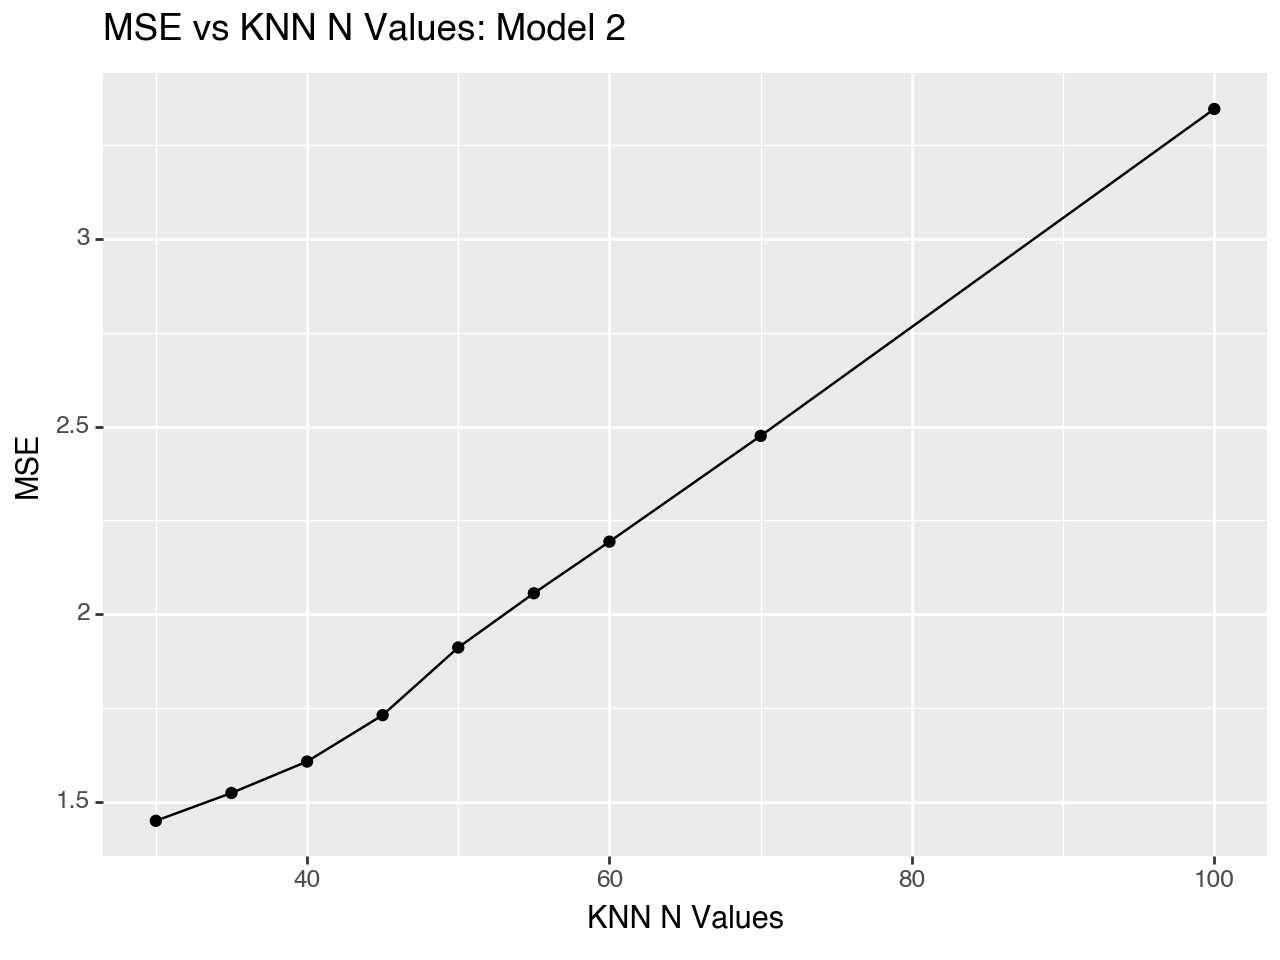

<Figure Size: (640 x 480)>

In [83]:
# Graph for KNN Model 1 MSE's vs Complexity 

df_knn = pd.DataFrame({
    'KNN N Values': [25, 20, 15, 10, 5, 4, 3, 2, 1],
    'MSE': k_scores
}) 

plot2 = (ggplot(df_knn, aes(x='KNN N Values', y='MSE'))
    + geom_point()
    + geom_line()
    + labs(title='MSE vs KNN N Values: Model 1', x='KNN N Values', y='MSE'))
print(plot2) 


df_knn_2 = pd.DataFrame({
    'KNN N Values 2': [30,35,40,45,50,55,60,70,100],
    'MSE_2': k_scores_2
}) 

plot2 = (ggplot(df_knn_2, aes(x='KNN N Values 2', y='MSE_2'))
    + geom_point()
    + geom_line()
    + labs(title='MSE vs KNN N Values: Model 2', x='KNN N Values', y='MSE'))
plot2 

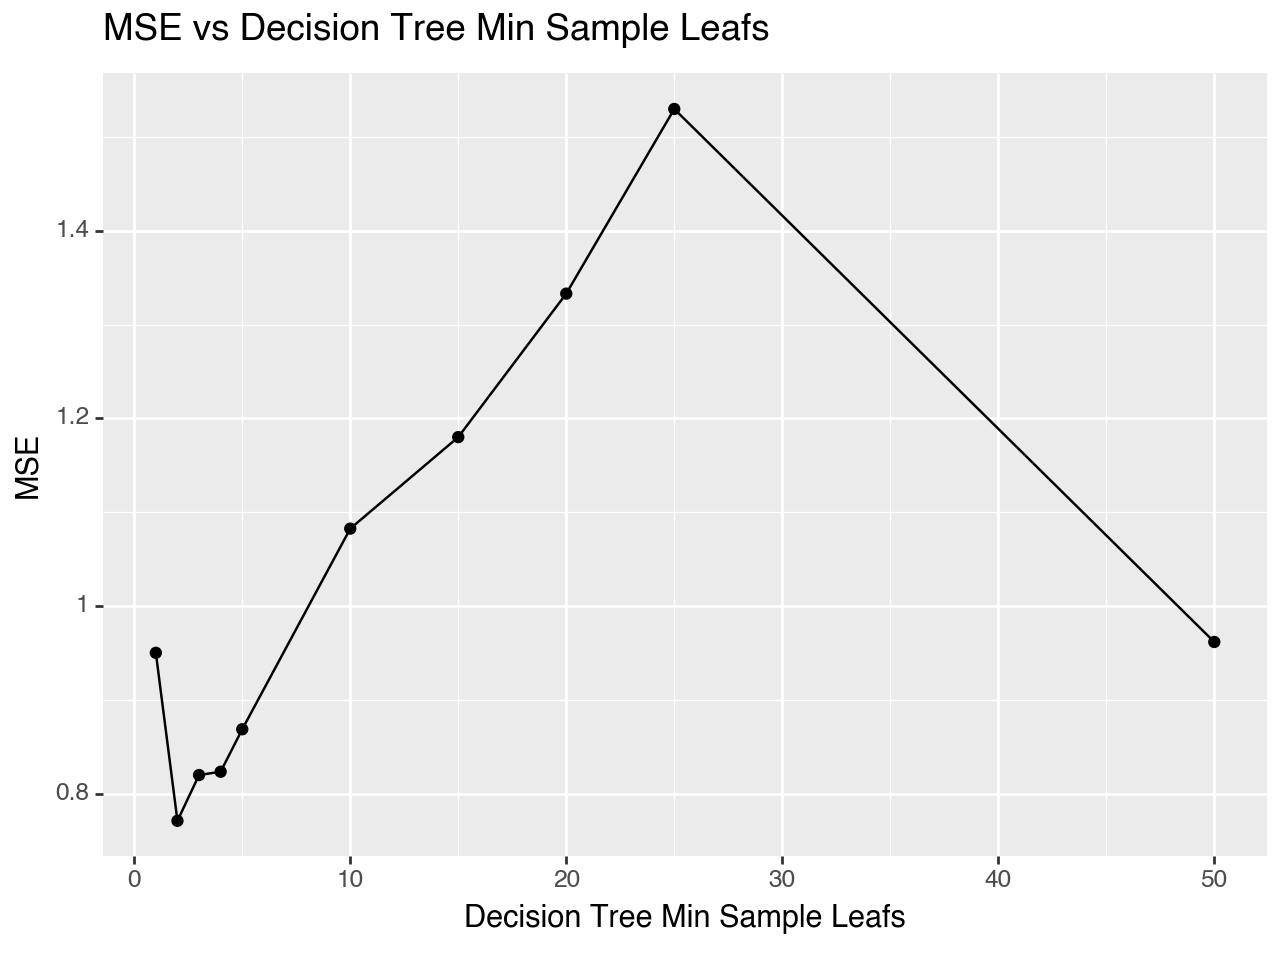

<Figure Size: (640 x 480)>

In [76]:
# Graph for Decision Tree MSE's vs Complexity 

df_dt = pd.DataFrame({
    'Decision Tree Min Sample Leafs': [25, 20, 15, 10, 50, 5, 4, 3, 2, 1],
    'MSE': dt_scores
})

plot3 = (ggplot(df_dt, aes(x='Decision Tree Min Sample Leafs', y='MSE'))
    + geom_point()
    + geom_line()
    + labs(title='MSE vs Decision Tree Min Sample Leafs', x='Decision Tree Min Sample Leafs', y='MSE'))
plot3 